In [3]:
#Load dependencies
import pandas as pd
import numpy as np
import plotly.express as px
import ydata_profiling as pdp
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import PyQt6



1. Loading the data


In [4]:
#loading and showing head data
df = pd.read_csv('flight_data.csv', index_col=0)
df.head(5)


,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
1,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0
2,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0
3,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0
4,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576,5.0,44.0
5,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0


In [5]:
df

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
1,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0
2,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0
3,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0
4,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576,5.0,44.0
5,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336772,2013,9,30,NaN,NaN,NaN,NaN,9E,NaN,3393,JFK,DCA,NaN,213,NaN,NaN
336773,2013,9,30,NaN,NaN,NaN,NaN,9E,NaN,3525,LGA,SYR,NaN,198,NaN,NaN
336774,2013,9,30,NaN,NaN,NaN,NaN,MQ,N535MQ,3461,LGA,BNA,NaN,764,NaN,NaN
336775,2013,9,30,NaN,NaN,NaN,NaN,MQ,N511MQ,3572,LGA,CLE,NaN,419,NaN,NaN


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 336776 entries, 1 to 336776
Data columns (total 16 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   year       336776 non-null  int64  
 1   month      336776 non-null  int64  
 2   day        336776 non-null  int64  
 3   dep_time   328521 non-null  float64
 4   dep_delay  328521 non-null  float64
 5   arr_time   328063 non-null  float64
 6   arr_delay  327346 non-null  float64
 7   carrier    336776 non-null  object 
 8   tailnum    334264 non-null  object 
 9   flight     336776 non-null  int64  
 10  origin     336776 non-null  object 
 11  dest       336776 non-null  object 
 12  air_time   327346 non-null  float64
 13  distance   336776 non-null  int64  
 14  hour       328521 non-null  float64
 15  minute     328521 non-null  float64
dtypes: float64(7), int64(5), object(4)
memory usage: 43.7+ MB


2. Understanding and cleaning the data

In [6]:
#Cleaning and formatting time columns
df['dep_time'] = df.dep_time[~df.dep_time.isna()].astype(np.int64).apply('{:0>4}'.format)
df['dep_time'] = pd.to_timedelta(df.dep_time.str[:2]+':'+df.dep_time.str[2:]+':00')



df['arr_time'] = df.arr_time[~df.arr_time.isna()].astype(np.int64).apply('{:0>4}'.format)
df['arr_time'] = pd.to_timedelta(df.arr_time.str[:2]+':'+df.arr_time.str[2:]+':00')


df[['dep_time' , 'arr_time', ]] = df[['dep_time', 'arr_time', ]].apply(lambda x: pd.to_timedelta(x))


#We have 458 flights where flight dep_time is present but arr_time, arr_delay and air_time is missing, 
#So we can replace arr_time and arr_delay 



In [7]:
#Add minutes
def addMinutes(time, mins):
    return (pd.to_timedelta(time) + pd.Timedelta(minutes=mins))

In [8]:
pd.read_csv('flight_data.csv')

,Unnamed: 0,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,1,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0
1,2,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0
2,3,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0
3,4,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576,5.0,44.0
4,5,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336771,336772,2013,9,30,NaN,NaN,NaN,NaN,9E,NaN,3393,JFK,DCA,NaN,213,NaN,NaN
336772,336773,2013,9,30,NaN,NaN,NaN,NaN,9E,NaN,3525,LGA,SYR,NaN,198,NaN,NaN
336773,336774,2013,9,30,NaN,NaN,NaN,NaN,MQ,N535MQ,3461,LGA,BNA,NaN,764,NaN,NaN
336774,336775,2013,9,30,NaN,NaN,NaN,NaN,MQ,N511MQ,3572,LGA,CLE,NaN,419,NaN,NaN


In [9]:
#Arrival delay threshold is -100 mins
arr_delay_thresh_mask = (df.arr_delay.notna() & (df.arr_delay < -100))
df.loc[arr_delay_thresh_mask, "arr_delay"] = (1440 + df.loc[arr_delay_thresh_mask, "arr_delay"])

In [10]:
#Replace add missing air_time
air_time_mask = (df.dep_time.notna() & df.arr_time.notna() & df.air_time.isna())
df.loc[air_time_mask, "air_time"] = abs((df.loc[air_time_mask, "arr_time"] - df.loc[air_time_mask, "dep_time"]).astype('timedelta64[s]')//60)

In [11]:

# Create two columns with Ontime, Late and Cancelled status for both departure and arrival
df.loc[df.dep_delay.isna(), "dep_status"]="Canceled"
df.loc[df.dep_delay <= 0, "dep_status"]="OnTime"
df.loc[df.dep_delay > 0, "dep_status"]="Late"
df.loc[df.arr_delay.isna(), "arr_status"]="Canceled"
df.loc[df.arr_delay <= 0, "arr_status"]="OnTime"
df.loc[df.arr_delay > 0, "arr_status"]="Late"


In [12]:
df

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute,dep_status,arr_status
1,2013,1,1,0 days 05:17:00,2.0,0 days 08:30:00,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0,Late,Late
2,2013,1,1,0 days 05:33:00,4.0,0 days 08:50:00,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0,Late,Late
3,2013,1,1,0 days 05:42:00,2.0,0 days 09:23:00,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0,Late,Late
4,2013,1,1,0 days 05:44:00,-1.0,0 days 10:04:00,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576,5.0,44.0,OnTime,OnTime
5,2013,1,1,0 days 05:54:00,-6.0,0 days 08:12:00,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0,OnTime,OnTime
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336772,2013,9,30,NaT,NaN,NaT,NaN,9E,NaN,3393,JFK,DCA,NaN,213,NaN,NaN,Canceled,Canceled
336773,2013,9,30,NaT,NaN,NaT,NaN,9E,NaN,3525,LGA,SYR,NaN,198,NaN,NaN,Canceled,Canceled
336774,2013,9,30,NaT,NaN,NaT,NaN,MQ,N535MQ,3461,LGA,BNA,NaN,764,NaN,NaN,Canceled,Canceled
336775,2013,9,30,NaT,NaN,NaT,NaN,MQ,N511MQ,3572,LGA,CLE,NaN,419,NaN,NaN,Canceled,Canceled


In [13]:
#Dropping unwanted columns
df.drop(columns=['year','hour','minute','tailnum'], inplace=True)

In [14]:
df.head()

,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,flight,origin,dest,air_time,distance,dep_status,arr_status
1,1,1,0 days 05:17:00,2.0,0 days 08:30:00,11.0,UA,1545,EWR,IAH,227.0,1400,Late,Late
2,1,1,0 days 05:33:00,4.0,0 days 08:50:00,20.0,UA,1714,LGA,IAH,227.0,1416,Late,Late
3,1,1,0 days 05:42:00,2.0,0 days 09:23:00,33.0,AA,1141,JFK,MIA,160.0,1089,Late,Late
4,1,1,0 days 05:44:00,-1.0,0 days 10:04:00,-18.0,B6,725,JFK,BQN,183.0,1576,OnTime,OnTime
5,1,1,0 days 05:54:00,-6.0,0 days 08:12:00,-25.0,DL,461,LGA,ATL,116.0,762,OnTime,OnTime


In [15]:
#Using proper data types 
df[['month','day', 'carrier', 'origin', 'dest', 'dep_status', 'arr_status']] = df[['month','day', 'carrier', 'origin','dest', 'dep_status', 'arr_status']].apply(lambda x: x.astype('category'))

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 336776 entries, 1 to 336776
Data columns (total 14 columns):
 #   Column      Non-Null Count   Dtype          
---  ------      --------------   -----          
 0   month       336776 non-null  category       
 1   day         336776 non-null  category       
 2   dep_time    328521 non-null  timedelta64[ns]
 3   dep_delay   328521 non-null  float64        
 4   arr_time    328063 non-null  timedelta64[ns]
 5   arr_delay   327346 non-null  float64        
 6   carrier     336776 non-null  category       
 7   flight      336776 non-null  int64          
 8   origin      336776 non-null  category       
 9   dest        336776 non-null  category       
 10  air_time    328063 non-null  object         
 11  distance    336776 non-null  int64          
 12  dep_status  336776 non-null  category       
 13  arr_status  336776 non-null  category       
dtypes: category(7), float64(2), int64(2), object(1), timedelta64[ns](2)
memory usage: 22.8+ M

In [17]:
df.head(10)

,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,flight,origin,dest,air_time,distance,dep_status,arr_status
1,1,1,0 days 05:17:00,2.0,0 days 08:30:00,11.0,UA,1545,EWR,IAH,227.0,1400,Late,Late
2,1,1,0 days 05:33:00,4.0,0 days 08:50:00,20.0,UA,1714,LGA,IAH,227.0,1416,Late,Late
3,1,1,0 days 05:42:00,2.0,0 days 09:23:00,33.0,AA,1141,JFK,MIA,160.0,1089,Late,Late
4,1,1,0 days 05:44:00,-1.0,0 days 10:04:00,-18.0,B6,725,JFK,BQN,183.0,1576,OnTime,OnTime
5,1,1,0 days 05:54:00,-6.0,0 days 08:12:00,-25.0,DL,461,LGA,ATL,116.0,762,OnTime,OnTime
6,1,1,0 days 05:54:00,-4.0,0 days 07:40:00,12.0,UA,1696,EWR,ORD,150.0,719,OnTime,Late
7,1,1,0 days 05:55:00,-5.0,0 days 09:13:00,19.0,B6,507,EWR,FLL,158.0,1065,OnTime,Late
8,1,1,0 days 05:57:00,-3.0,0 days 07:09:00,-14.0,EV,5708,LGA,IAD,53.0,229,OnTime,OnTime
9,1,1,0 days 05:57:00,-3.0,0 days 08:38:00,-8.0,B6,79,JFK,MCO,140.0,944,OnTime,OnTime
10,1,1,0 days 05:58:00,-2.0,0 days 07:53:00,8.0,AA,301,LGA,ORD,138.0,733,OnTime,Late


3. Pandas Profiling

In [18]:
#Generate profile reports
profileReport = pdp.ProfileReport(df)
#Import profile report
profileReport.to_file(output_file="profile.html")
#profileReport

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

KeyboardInterrupt: 

4. Distribution of data

In [19]:
df.describe()

,dep_time,dep_delay,arr_time,arr_delay,flight,distance
count,328521,328521.000000,328063,327346.000000,336776.000000,336776.000000
mean,0 days 13:42:10.090131224,12.639070,0 days 15:13:01.249150315,6.895377,1971.923620,1039.912604
std,0 days 04:52:43.859391633,40.210061,0 days 05:20:10.365287578,44.633292,1632.471938,733.233033
min,0 days 00:01:00,-43.000000,0 days 00:01:00,-86.000000,1.000000,17.000000
25%,0 days 09:07:00,-5.000000,0 days 11:04:00,-17.000000,553.000000,502.000000
50%,0 days 14:01:00,-2.000000,0 days 15:35:00,-5.000000,1496.000000,872.000000
75%,0 days 17:44:00,11.000000,0 days 19:40:00,14.000000,3465.000000,1389.000000
max,1 days 00:00:00,1301.000000,1 days 00:00:00,1272.000000,8500.000000,4983.000000


In [20]:
df.dtypes

month                category
day                  category
dep_time      timedelta64[ns]
dep_delay             float64
arr_time      timedelta64[ns]
arr_delay             float64
carrier              category
flight                  int64
origin               category
dest                 category
air_time               object
distance                int64
dep_status           category
arr_status           category
dtype: object

In [21]:
df = df.dropna()

Generate some correlation plots of the features to see how related one feature is to the next.

In [22]:
df

,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,flight,origin,dest,air_time,distance,dep_status,arr_status
1,1,1,0 days 05:17:00,2.0,0 days 08:30:00,11.0,UA,1545,EWR,IAH,227.0,1400,Late,Late
2,1,1,0 days 05:33:00,4.0,0 days 08:50:00,20.0,UA,1714,LGA,IAH,227.0,1416,Late,Late
3,1,1,0 days 05:42:00,2.0,0 days 09:23:00,33.0,AA,1141,JFK,MIA,160.0,1089,Late,Late
4,1,1,0 days 05:44:00,-1.0,0 days 10:04:00,-18.0,B6,725,JFK,BQN,183.0,1576,OnTime,OnTime
5,1,1,0 days 05:54:00,-6.0,0 days 08:12:00,-25.0,DL,461,LGA,ATL,116.0,762,OnTime,OnTime
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336766,9,30,0 days 22:40:00,-5.0,0 days 23:34:00,-17.0,B6,1816,JFK,SYR,41.0,209,OnTime,OnTime
336767,9,30,0 days 22:40:00,-10.0,0 days 23:47:00,-20.0,B6,2002,JFK,BUF,52.0,301,OnTime,OnTime
336768,9,30,0 days 22:41:00,-5.0,0 days 23:45:00,-16.0,B6,486,JFK,ROC,47.0,264,OnTime,OnTime
336769,9,30,0 days 23:07:00,12.0,0 days 23:59:00,1.0,B6,718,JFK,BOS,33.0,187,Late,Late


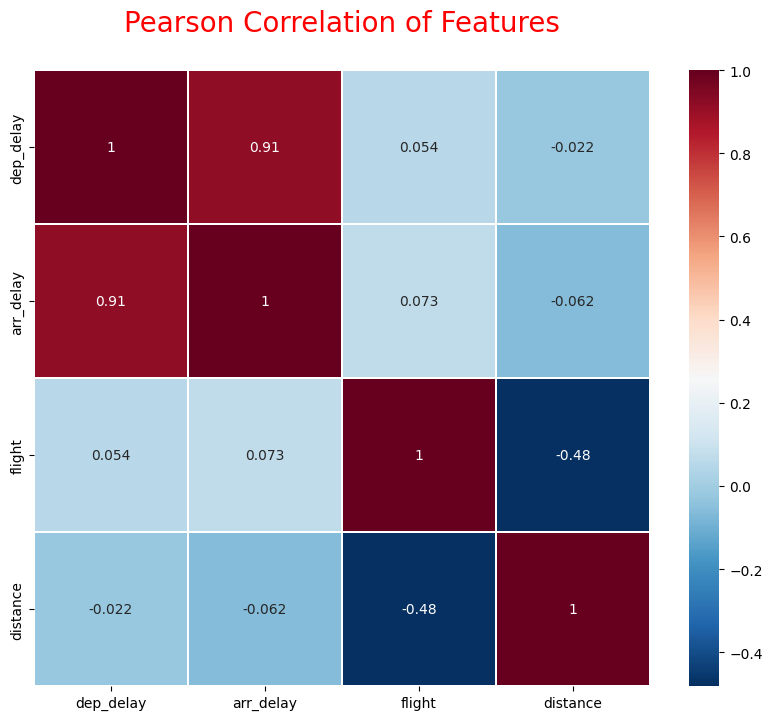

In [24]:
num_df = df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(10,8))
plt.title('Pearson Correlation of Features', y=1.05, size=20, color='Red')
sns.heatmap(num_df.corr(), linewidths=0.1, vmax=1.0, square=True, cmap='RdBu_r', linecolor='white', annot=True)
plt.show()

In [131]:
df1 = df
temp = df

 5. Exploratory data analysis

      5.1 Flights Frequency


    5.1.1 Busiest airport in terms of flights departure

In [132]:
buzAir = df.groupby(['origin'])['origin'].count()
buzAir

origin
EWR    120835
JFK    111279
LGA    104662
Name: origin, dtype: int64

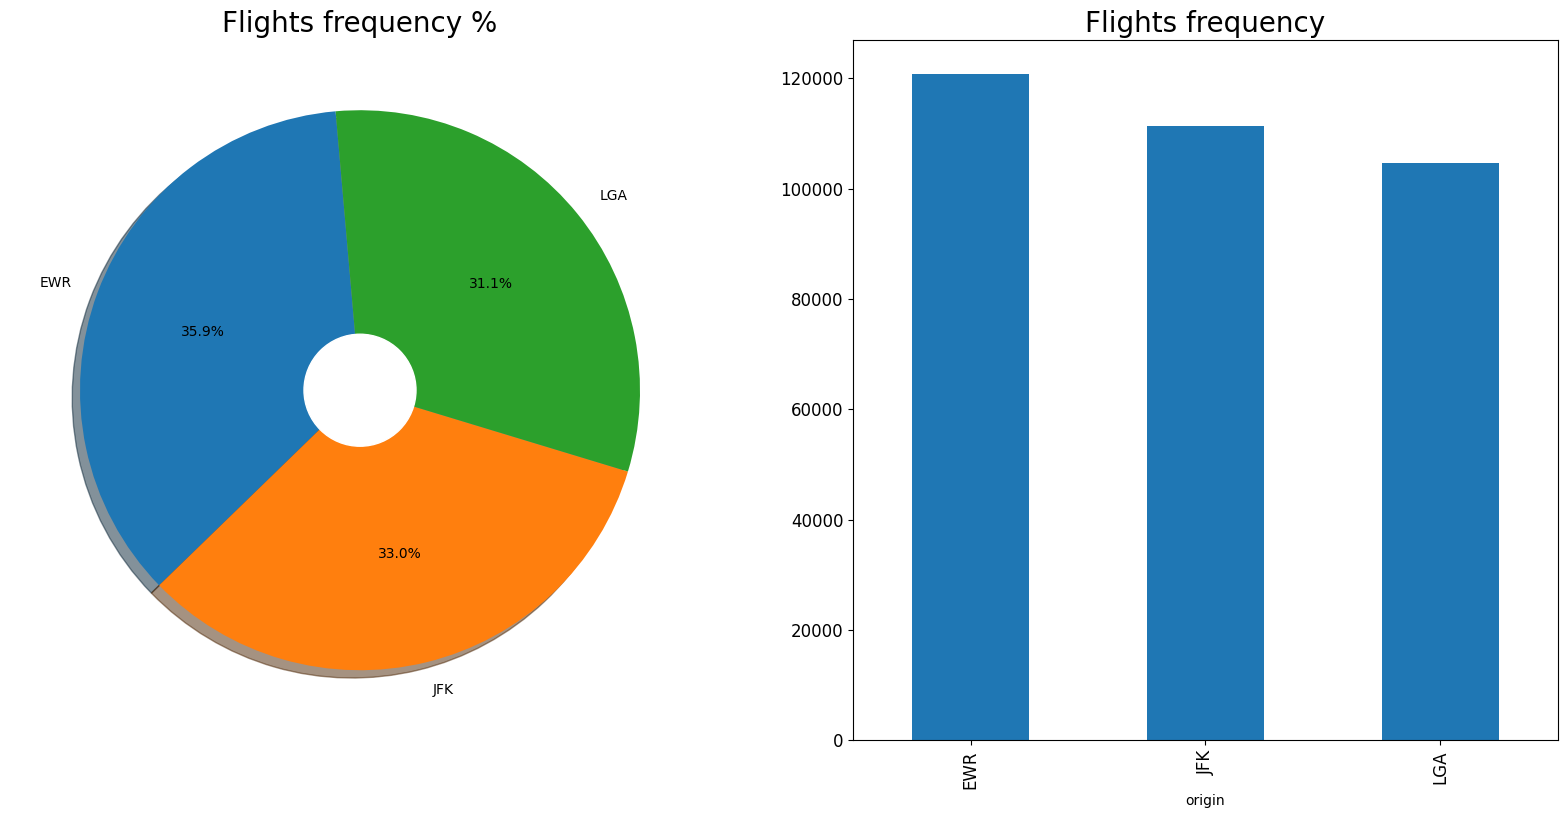

In [133]:
fig = plt.figure(figsize=[20, 20])
ax = fig.add_subplot(221)
ax.pie(buzAir, labeldistance=1.1, labels=buzAir.index, startangle=95, autopct='%1.1f%%', shadow=True)
ax.set_title("Flights frequency %", fontsize=20);
plt.gcf().gca().add_artist(plt.Circle( (0,0), 0.2, color='white'))

ax2 = fig.add_subplot(222)
ax2.set_title("Flights frequency", fontsize=20);
ax2.set_facecolor('white')
buzAir.plot(kind='bar', ax=ax2,  legend=False, fontsize=12)
plt.show()
#EWR is the busiest airport with 35.9% of total flights departed from this airport, followed by JFK(33%) and LGA(31.1%)

5.1.2 Flights frequency across months

In [134]:
buzMonth = df.groupby(['month'])['month'].count()
buzMonth

month
1     27004
2     24951
3     28834
4     28330
5     28796
6     28243
7     29425
8     29327
9     27574
10    28889
11    27268
12    28135
Name: month, dtype: int64

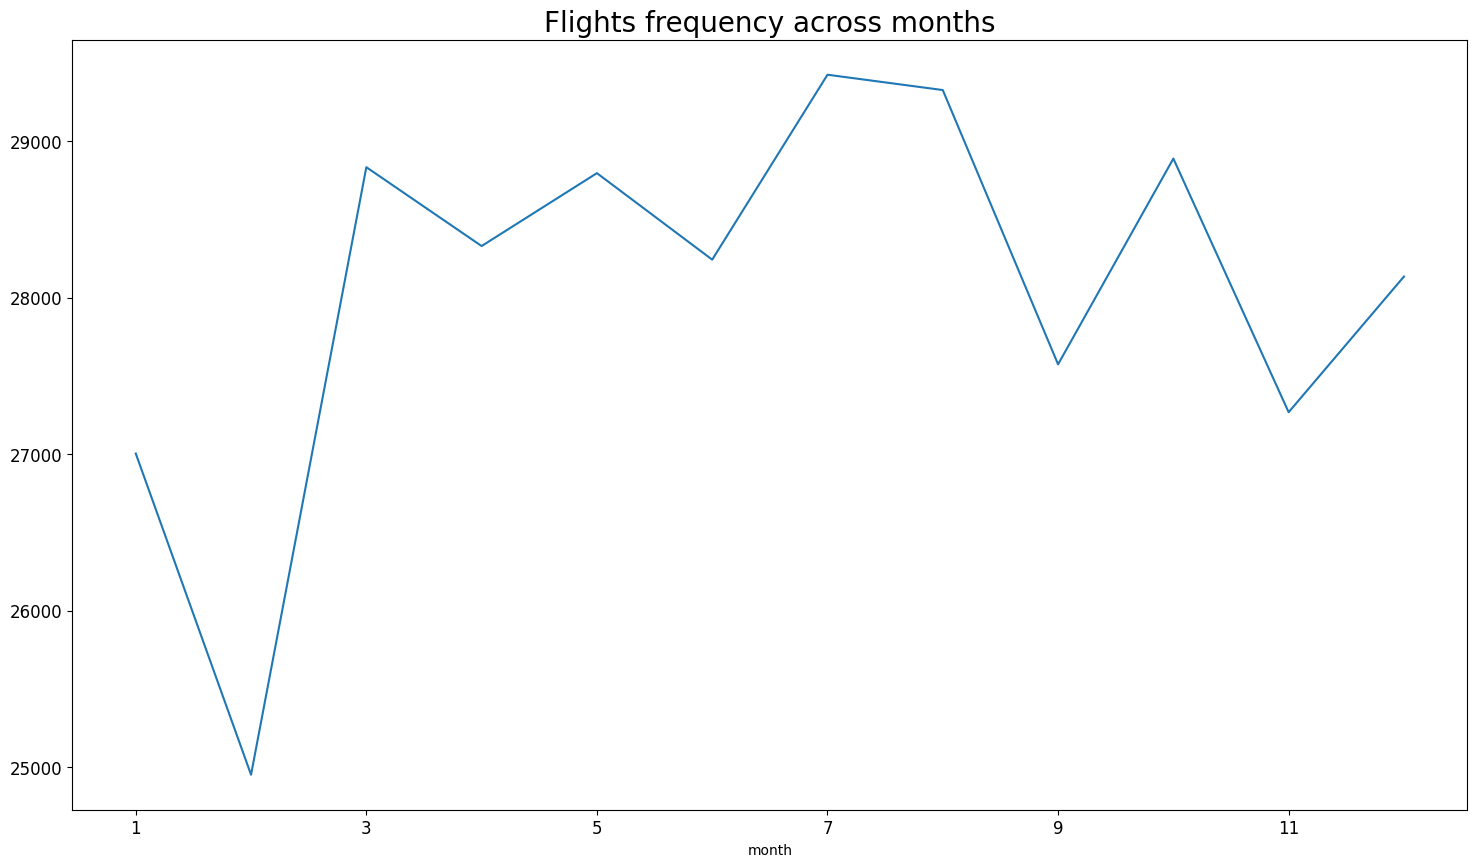

In [135]:
fig = plt.figure(figsize=[18, 10])
ax = fig.add_subplot(111)
ax.set_facecolor('white')
ax.set_title("Flights frequency across months", fontsize=20);
buzMonth.plot(ax=ax,  legend=False, fontsize=12)
plt.show()

Flights frequency is lowest in February which is below 25000.

5.2 Departure and Arrival status

In [136]:
depStatus = df.groupby('dep_status')['dep_status'].count()
arrStatus = df.groupby('arr_status')['arr_status'].count()
print(depStatus)
print()
print(arrStatus)

dep_status
Canceled      8255
Late        128432
OnTime      200089
Name: dep_status, dtype: int64

arr_status
Canceled      9430
Late        133004
OnTime      194342
Name: arr_status, dtype: int64


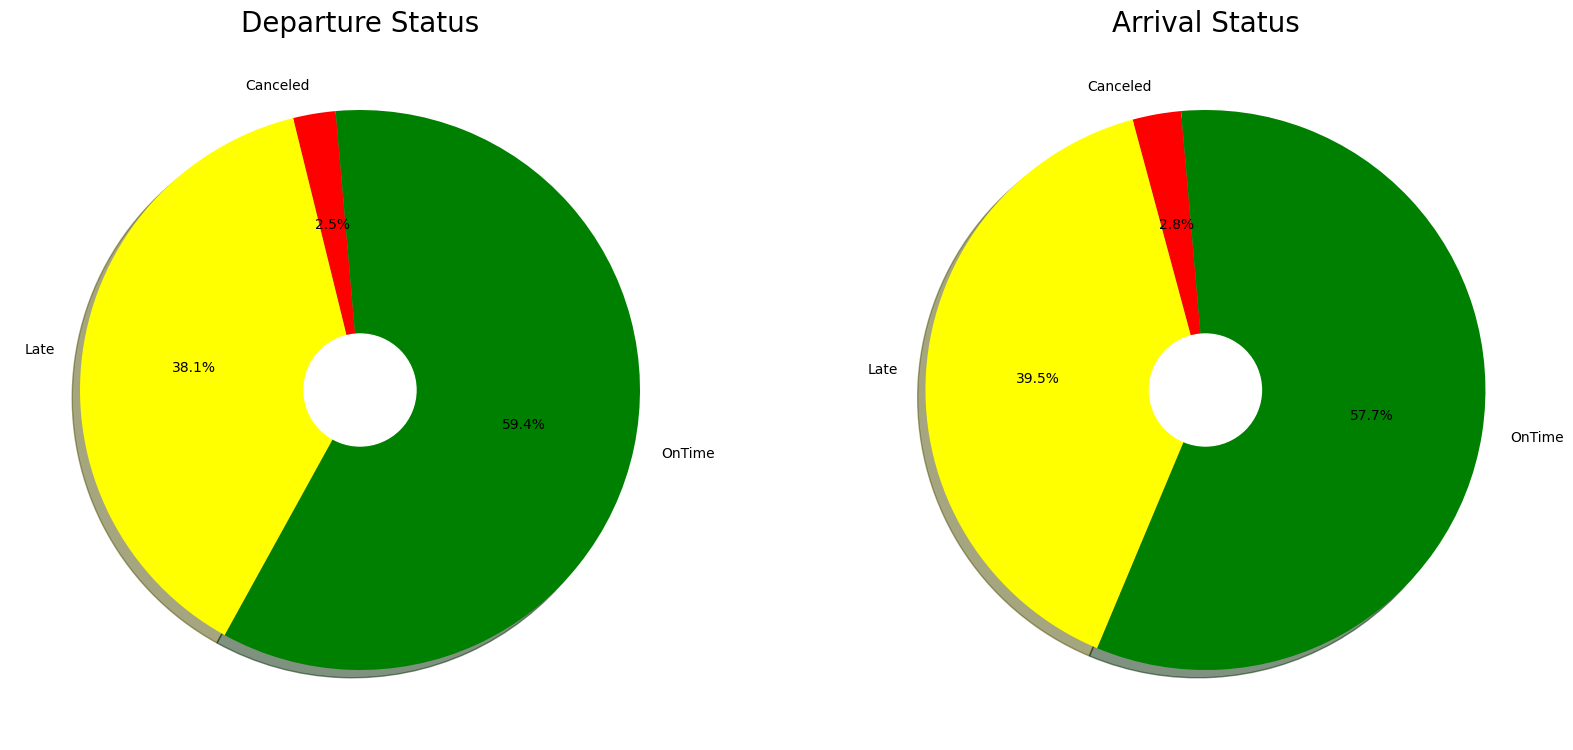

In [137]:
fig = plt.figure(figsize=[20, 20])
ax = fig.add_subplot(221)
ax.pie(depStatus, labeldistance=1.1, labels=depStatus.index, startangle=95, autopct='%1.1f%%', shadow=True, colors=['red','yellow','green'])
ax.set_title("Departure Status", fontsize=20);
plt.gcf().gca().add_artist(plt.Circle( (0,0), 0.2, color='white'))

ax2 = fig.add_subplot(222)
ax2.pie(arrStatus, labeldistance=1.1, labels=arrStatus.index, startangle=95, autopct='%1.1f%%', shadow=True, colors=['red','yellow','green'])
ax2.set_title("Arrival Status", fontsize=20);
plt.gcf().gca().add_artist(plt.Circle( (0,0), 0.2, color='white'))
plt.show()

Out of 336776 flights, 200089(59.1%) flights in 2013 were departed on time, 128432(38.1%) were delayed and just 8255(2.5%) of flights were canceled.


5.3 Delayed Flights
5.3.1 Best and worst airport in terms of departure and arrival delay

In [138]:
depAir = df.loc[df['dep_status'] == 'Late'].groupby(['origin','dep_status'])['dep_status'].count().unstack('dep_status')
depAir

dep_status,Canceled,Late,OnTime
origin,,,
EWR,0,52711,0
JFK,0,42031,0
LGA,0,33690,0


In [139]:
arrAir = df.loc[df['arr_status'] == 'Late'].groupby(['origin','arr_status'])['arr_status'].count().unstack('arr_status')
arrAir

arr_status,Canceled,Late,OnTime
origin,,,
EWR,0,50099,0
JFK,0,42885,0
LGA,0,40020,0


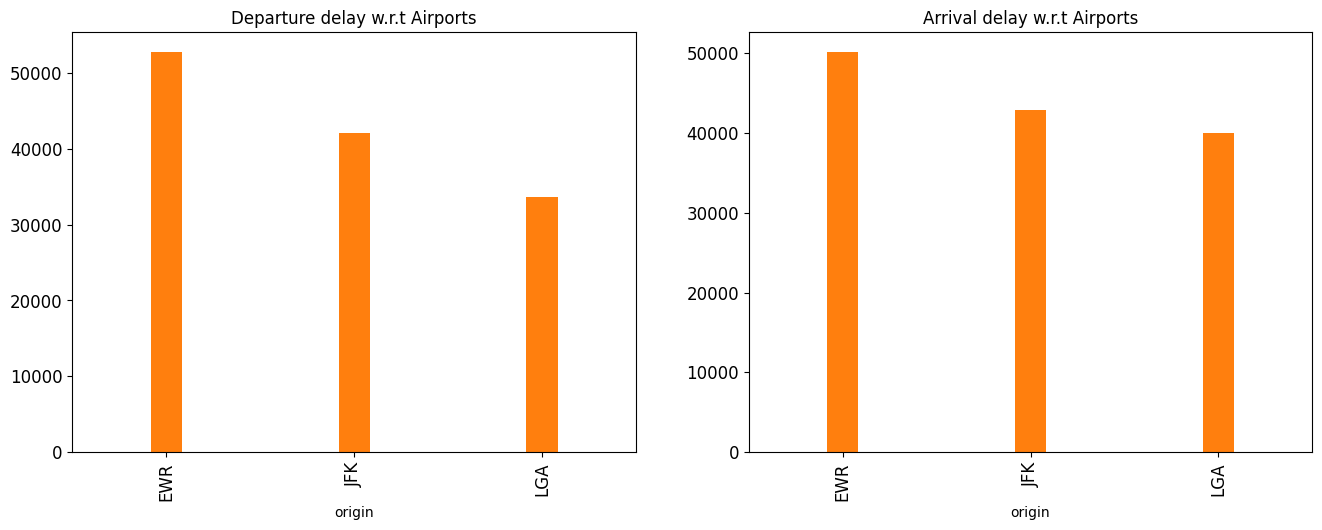

In [140]:
fig = plt.figure(figsize=[16, 12])
ax = fig.add_subplot(221)
depAir.plot(kind='bar', ax=ax, title ="Departure delay w.r.t Airports",  legend=False, fontsize=12)
ax2 = fig.add_subplot(222)
ax.set_facecolor('white')
ax2.set_facecolor('white')
arrAir.plot(kind='bar', ax=ax2, title ="Arrival delay w.r.t Airports",  legend=False, fontsize=12)
plt.show()

#LGA airport is best in terms of departure and arrival delay, where as EWR is worst with 5000+ delayed flights.


5.3.2 Best and worst airport w.r.t departure delay %

In [141]:
depAirPer = df.groupby('origin')['origin'].count().reset_index(name='total')
delayedFlights = df.loc[df['dep_status'] == 'Late'].groupby(['origin','dep_status'])['dep_status'].count().unstack('dep_status')
depAirPer['late'] = delayedFlights['Late'].values
depAirPer['percentage'] = (depAirPer['late']/depAirPer['total'])*100
depAirPer.set_index('origin', inplace=True)
depAirPer


,total,late,percentage
origin,,,
EWR,120835,52711,43.622295
JFK,111279,42031,37.770828
LGA,104662,33690,32.189333


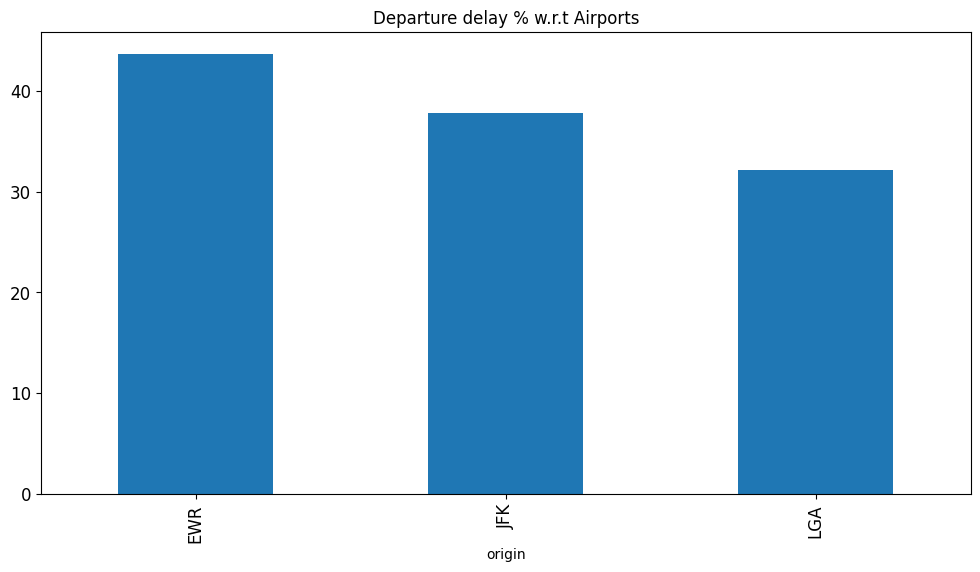

In [142]:
depAirPer['percentage'].plot(kind='bar', figsize=[12,6], title ="Departure delay % w.r.t Airports",  legend=False, fontsize=12)
plt.gca().set_facecolor('white')
plt.show()
#43% of total flight departed from EWR were delayed, which is highest among all.


5.3.3 Best and worst carrier in terms of departure delay %

In [143]:
depCarrier = df1.loc[df1['dep_status'] == 'Late'].groupby(['carrier','dep_status'])['dep_status'].count().unstack('dep_status')
depCarrier

dep_status,Canceled,Late,OnTime
carrier,,,
9E,0,7063,0
AA,0,10162,0
AS,0,226,0
B6,0,21445,0
DL,0,15241,0
EV,0,23139,0
F9,0,341,0
FL,0,1654,0
HA,0,69,0


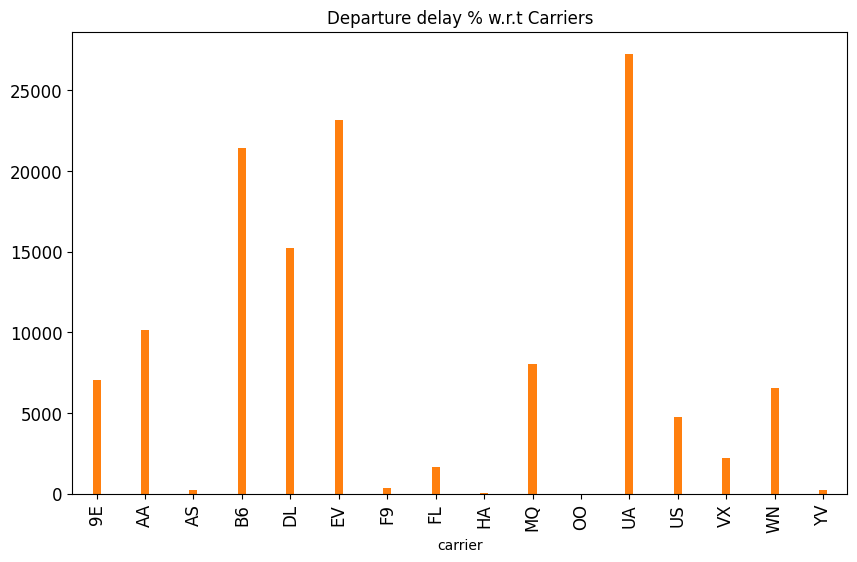

In [144]:
depCarrier.plot(kind='bar', figsize=[10,6], title ="Departure delay % w.r.t Carriers",  legend=False, fontsize=12)
plt.gca().set_facecolor('white')
plt.show()


In [145]:
depCarrierPer = df1.groupby('carrier')['carrier'].count().reset_index(name='total')
delayedFlights = df1.loc[df1['dep_status'] == 'Late'].groupby(['carrier','dep_status'])['dep_status'].count().unstack('dep_status')
depCarrierPer['late'] = delayedFlights['Late'].values
depCarrierPer['percentage'] = (depCarrierPer['late']/depCarrierPer['total'])*100
depCarrierPer.set_index('carrier', inplace=True)
depCarrierPer

,total,late,percentage
carrier,,,
9E,18460,7063,38.261105
AA,32729,10162,31.048917
AS,714,226,31.652661
B6,54635,21445,39.251396
DL,48110,15241,31.679485
EV,54173,23139,42.713160
F9,685,341,49.781022
FL,3260,1654,50.736196
HA,342,69,20.175439


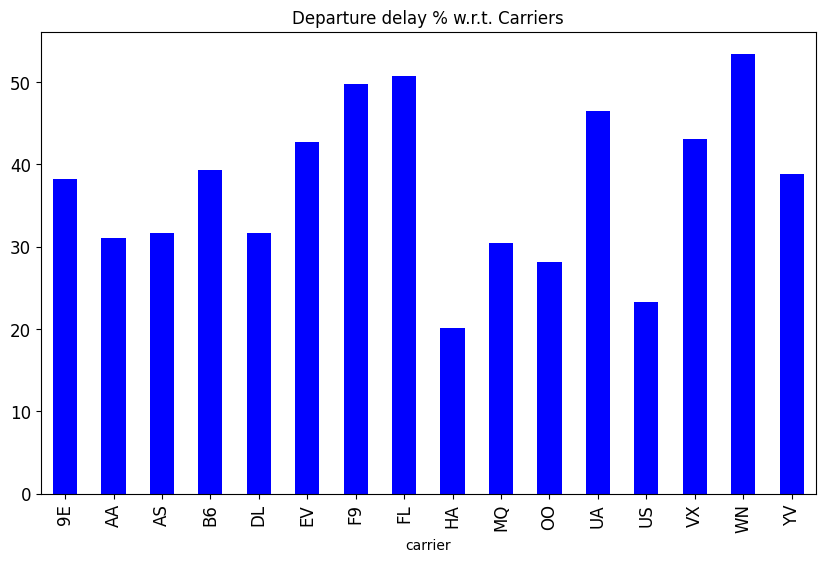

In [146]:
depCarrierPer[['percentage']].plot(kind='bar', figsize=[10,6], title ="Departure delay % w.r.t. Carriers",  legend=False, fontsize=12, color='blue')
plt.gca().set_facecolor('white')
plt.show()
#HA carrier is best in terms of departure delay with just 20% of total flight got delayed, On other hand WN performed worst with 53% of delayed flights followed by FL and F9.

5.3.4 Departure delay across months

In [147]:
depMonth = df1.loc[df1['dep_status'] == 'Late'].groupby(['month','dep_status'])['dep_status'].count().unstack('dep_status')
depMonth

dep_status,Canceled,Late,OnTime
month,,,
1,0,9662,0
2,0,9124,0
3,0,11209,0
4,0,10543,0
5,0,11291,0
6,0,12655,0
7,0,13909,0
8,0,11713,0
9,0,7815,0


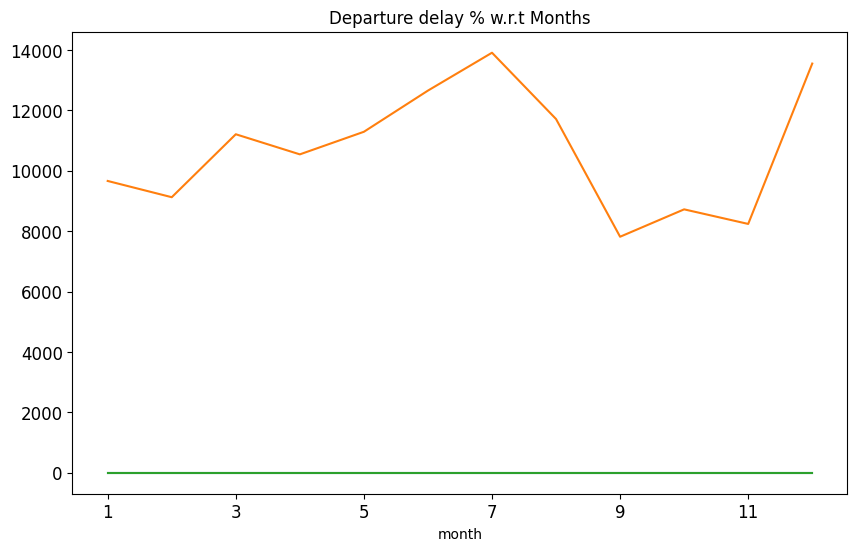

In [148]:
depMonth.plot(figsize=[10,6], title ="Departure delay % w.r.t Months",  legend=False, fontsize=12)
plt.gca().set_facecolor('white')
plt.show()

In [149]:
routeDelay = df.loc[df['dep_status'] == 'Late'].groupby(['origin','dest','dep_status'])['dep_status'].count().reset_index(name='total')
routeDelay = routeDelay[routeDelay.groupby('origin')['total'].transform(max) == routeDelay['total']].sort_values('total')
#As we can see from the above graph, flights delay is more in June, July and December months, where as September is best month to travel.

5.3.5 Departure delay count w.r.t origin and dest

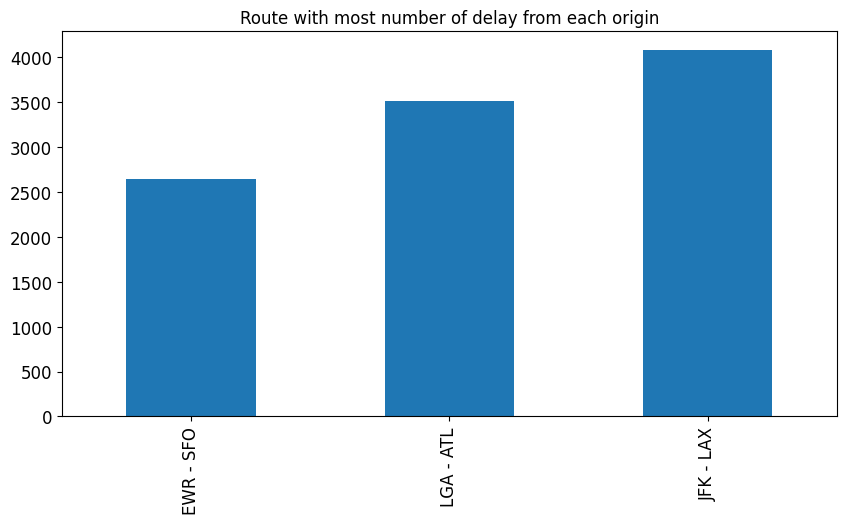

In [150]:
routeDelay.plot(kind='bar', figsize=[10,5], title ="Route with most number of delay from each origin",  legend=False, fontsize=12)
plt.gca().set_xticklabels(routeDelay['origin'].astype(str) + " - "+routeDelay['dest'].astype(str))
plt.gca().set_facecolor('white')
plt.show()
#JFK-LAX route had most number of flight delay in 2013.

5.4 Canceled Flights

  5.4.1 Best and worst airport in terms of number of flights canceled

In [151]:
canAir = df.loc[df['dep_status'] == 'Canceled'].groupby(['origin','dep_status'])['dep_status'].count().unstack('dep_status')
canAir

dep_status,Canceled,Late,OnTime
origin,,,
EWR,3239,0,0
JFK,1863,0,0
LGA,3153,0,0


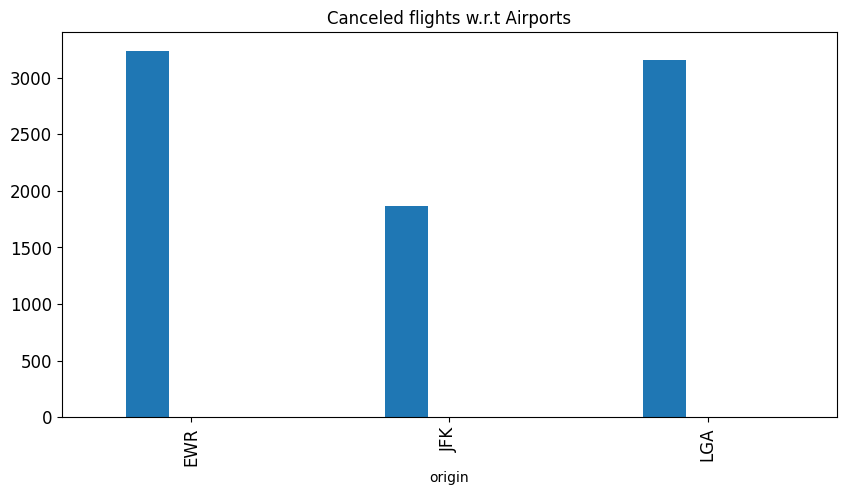

In [152]:
canAir.plot(kind='bar', figsize=[10,5], title ="Canceled flights w.r.t Airports",  legend=False, fontsize=12)
plt.gca().set_facecolor('white')
plt.show()
#1863 flights got canceled from JFK airport in 2013, which is lowest among all

5.4.2 Best and worst airport w.r.t flight cancellation %

In [153]:
canAirPer = df.groupby('origin')['origin'].count().reset_index(name='total')
canceledFlights = df1.loc[df1['dep_status'] == 'Canceled'].groupby(['origin','dep_status'])['dep_status'].count().unstack('dep_status')
canAirPer['canceled'] = canceledFlights['Canceled'].values
canAirPer['percentage'] = (canAirPer['canceled']/canAirPer['total'])*100
canAirPer.set_index('origin', inplace=True)
canAirPer

,total,canceled,percentage
origin,,,
EWR,120835,3239,2.680515
JFK,111279,1863,1.674170
LGA,104662,3153,3.012555


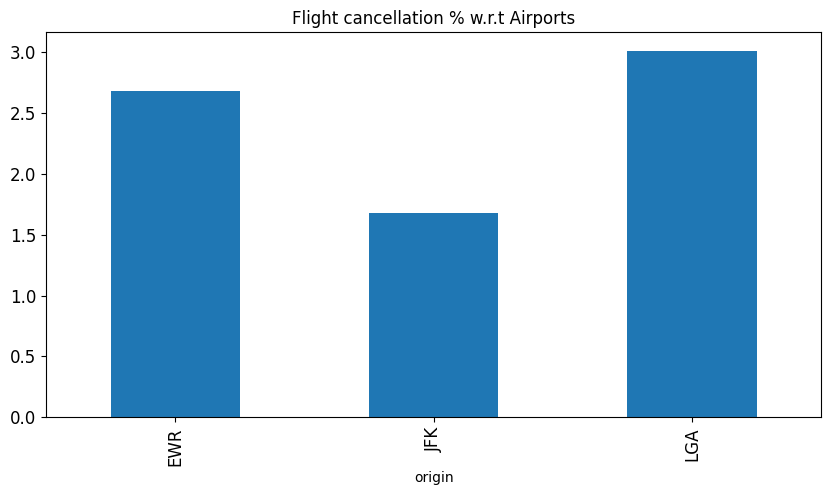

In [154]:
canAirPer['percentage'].plot(kind='bar', figsize=[10,5], title ="Flight cancellation % w.r.t Airports",  legend=False, fontsize=12)
plt.gca().set_facecolor('white')
plt.show()
#3% of total flight got canceled LGA airport, which is highest among all.

5.4.3 Best and worst carrier w.r.t total flight canceled

In [155]:
canCarrier = df.loc[df['dep_status'] == 'Canceled'].groupby(['carrier','dep_status'])['dep_status'].count().unstack('dep_status')
canCarrier

dep_status,Canceled,Late,OnTime
carrier,,,
9E,1044,0,0
AA,636,0,0
AS,2,0,0
B6,466,0,0
DL,349,0,0
EV,2817,0,0
F9,3,0,0
FL,73,0,0
HA,0,0,0


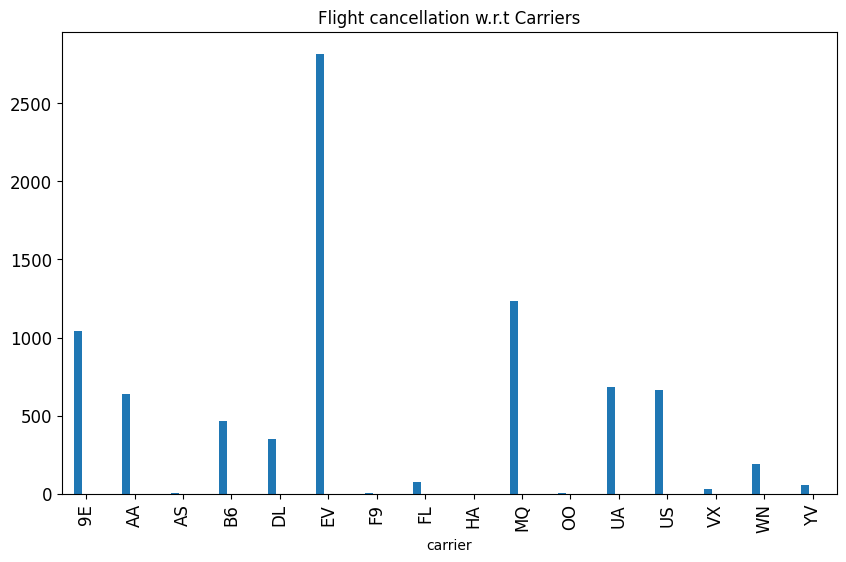

In [156]:
canCarrier.plot(kind='bar', figsize=[10,6], title ="Flight cancellation w.r.t Carriers",  legend=False, fontsize=12)
plt.gca().set_facecolor('white')
plt.show()
#AS, F9 and OO carriers are best in terms of flight cancellation.


5.4.4 Flight cancellation across months

In [157]:
canMonth = df1.loc[df['dep_status'] == 'Canceled'].groupby(['month','dep_status'])['dep_status'].count().unstack('dep_status')
canMonth

dep_status,Canceled,Late,OnTime
month,,,
1,521,0,0
2,1261,0,0
3,861,0,0
4,668,0,0
5,563,0,0
6,1009,0,0
7,940,0,0
8,486,0,0
9,452,0,0


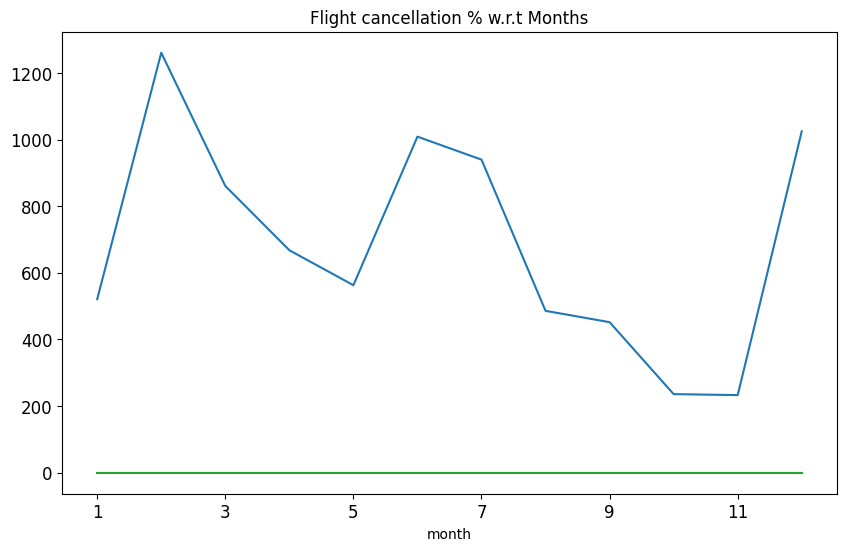

In [158]:
canMonth.plot(figsize=[10,6], title ="Flight cancellation % w.r.t Months",  legend=False, fontsize=12)
plt.gca().set_facecolor('white')
plt.show()
#Flight cancellation is lowest in October and November months

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 336776 entries, 1 to 336776
Data columns (total 14 columns):
 #   Column      Non-Null Count   Dtype          
---  ------      --------------   -----          
 0   month       336776 non-null  category       
 1   day         336776 non-null  category       
 2   dep_time    328521 non-null  timedelta64[ns]
 3   dep_delay   328521 non-null  float64        
 4   arr_time    328063 non-null  timedelta64[ns]
 5   arr_delay   327346 non-null  float64        
 6   carrier     336776 non-null  category       
 7   flight      336776 non-null  int64          
 8   origin      336776 non-null  category       
 9   dest        336776 non-null  category       
 10  air_time    328063 non-null  object         
 11  distance    336776 non-null  int64          
 12  dep_status  336776 non-null  category       
 13  arr_status  336776 non-null  category       
dtypes: category(7), float64(2), int64(2), object(1), timedelta64[ns](2)
memory usage: 30.9+ M

In [160]:
def convert_to_number(v):
    try:
        return float(v)
    except:
        # print(v)
        return np.nan
    
df['air_time'] = df['air_time'].apply(convert_to_number)

5.5 Flight speed


5.5.1 Fastest and slowest flight in 2013

In [161]:
df['speed'] = df['distance']/(df['air_time']/60)

In [162]:
print(df.iloc[df['speed'].idxmax()])

month                       5
day                        25
dep_time      0 days 17:12:00
dep_delay                37.0
arr_time      0 days 18:49:00
arr_delay                23.0
carrier                    EV
flight                   4537
origin                    EWR
dest                      MEM
air_time                136.0
distance                  946
dep_status               Late
arr_status               Late
speed              417.352941
Name: 216449, dtype: object


In [163]:
print(df.iloc[df['speed'].idxmin()])

month                       1
day                        28
dep_time      0 days 19:18:00
dep_delay                -2.0
arr_time      0 days 22:17:00
arr_delay               -29.0
carrier                    DL
flight                     83
origin                    JFK
dest                      FLL
air_time                144.0
distance                 1069
dep_status             OnTime
arr_status             OnTime
speed              445.416667
Name: 24100, dtype: object


Average flight speed across all carriers

In [164]:
flightSpeed = df.groupby(['carrier'])['speed'].mean()
flightSpeed

carrier
9E    345.430398
AA    417.472739
AS    443.678889
B6    399.971468
DL    418.462807
EV    362.943626
F9    425.172111
FL    394.358094
HA    480.357719
MQ    368.402836
OO    366.320085
UA    420.883774
US    341.939717
VX    446.174935
WN    400.532009
YV    331.969987
Name: speed, dtype: float64

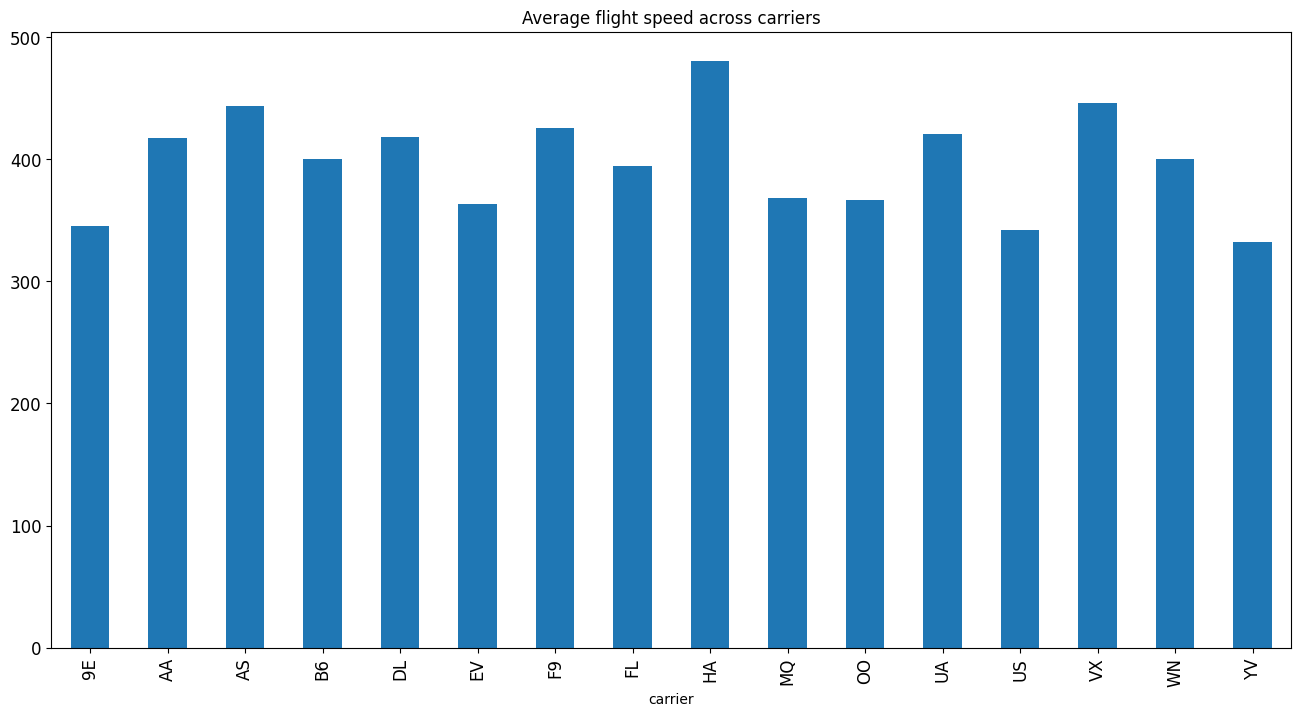

In [165]:
flightSpeed.plot(kind='bar', figsize=[16,8], title ="Average flight speed across carriers",  legend=False, fontsize=12)
plt.gca().set_facecolor('white')
plt.savefig('k.png')
#HA is best in terms of average flight speed with 480 miles/hr

CONCLUSION



In 2013, around 39% of flight got delayed and most of them were in June, July and December months. From flight frequency graph we can see that air traffic is more in these 3 months, So this is on the reason flights got delayed in June, July and December months.
